# Naver API 활용 몰스킨 데이터 수집 및 시각화

---
## 1. 네이버 검색 API 호출 - 쇼핑 검색

In [2]:
import os
import sys
import urllib.request

client_id = "SGLHGjPZGSsFRhhdmqyJ"
client_secret = "ECpkEOboRw"

encText = urllib.parse.quote("몰스킨")
url = "https://openapi.naver.com/v1/search/blog?query=" + encText # JSON 결과

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)

response = urllib.request.urlopen(request)
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Wed, 09 Oct 2024 01:02:56 +0900",
	"total":53625,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"베트남 스타벅스 2023 MD 달력 <b>몰스킨<\/b> 다이어리",
			"link":"https:\/\/gem87.tistory.com\/736",
			"description":"'2023년 <b>몰스킨<\/b> 다이어리'도 있는데, 이건 스타벅스 카드에 2.3 mil vnd 이상을 충전해야 하는 것이... 혹여나 쓴다 하여도 굳이 <b>몰스킨<\/b> 다이어리를 쓸 필요가 없기 때문에 포기. <b>몰스킨<\/b> 다이어리의 기본 가격이 꽤... ",
			"bloggername":"몽상가",
			"bloggerlink":"https:\/\/gem87.tistory.com\/",
			"postdate":"20221226"
		},
		{
			"title":"두 번째 모닝페이지 노트를 채우며 : 노트 비교(펜코, <b>몰스킨<\/b>)",
			"link":"https:\/\/blog.naver.com\/nanab9\/223041431750",
			"description":"세 번째 모닝페이지 노트는 <b>몰스킨<\/b> 클래식 룰드 하드커버 노트 라지 블랙 결론은 <b>몰스킨<\/b>이었다. 그리고 나는 그런 내 판단을 기록 첫날부터 후회하기 시작했다. 쿠팡에서 오랜만에 쇼핑하러 왔다며 5천 원이나... ",
			"bloggername":"책 속에 다락방",
			"bloggerlink":"blog.naver.com\/nanab9",
			"postdate":"20230311"
		},
		{
			"title":"르몽생미셸 워크재킷 <b>몰스킨<\/b> 개버딘 신세계백화점... ",
			"link":"https:\/\/blog.naver.com\/ungsblue\/223408495009",
			"description":"르

---
## 2. url 생성 함수
- api_node : 검색 노드 선택(shop, blog, book ...)
- search_text : 검색할 단어
- start_num : url에서 start 파라미터로 전달할 값
- disp_num : url에서 display 파라미터로 전달할 값

In [7]:
def gen_search_url(api_node, search_text, start_num, disp_num) :
    base = "https://openapi.naver.com/v1/search"
    node = "/" + api_node + ".json"
    param_query = "?query=" + urllib.parse.quote(search_text) 
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)

    return base + node + param_query + param_start + param_disp

- 네이버 쇼핑에 “몰스킨” 단어를 검색했을 때, 10번째 제품부터 3개에 대한 제품 데이터를 가져올 url 생성

In [8]:
gen_search_url('shop', 'TEST', 10, 3)

'https://openapi.naver.com/v1/search/shop.json?query=TEST&start=10&display=3'

---
## 3. 한 개 페이지에서 데이터를 가져올 함수 생성

In [9]:
import json
import datetime

def get_result_onpage(url, c_id, c_secret) :
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", c_id)
    request.add_header("X-Naver-Client-Secret", c_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if rescode==200 :
        print("[%s] Url Request Success" % datetime.datetime.now())
        return json.loads(response.read().decode("utf-8"))
    else :
        print("Error Code:" + rescode)

In [14]:
client_id = "SGLHGjPZGSsFRhhdmqyJ"
client_secret = "ECpkEOboRw"

api_node = "shop"
search_text = "몰스킨"
start_num = 1
disp_num = 5

url = gen_search_url(api_node, search_text, start_num, disp_num)
one_result = get_result_onpage(url, client_id, client_secret)

one_result

[2024-10-09 01:32:56.469999] Url Request Success


{'lastBuildDate': 'Wed, 09 Oct 2024 01:32:56 +0900',
 'total': 44817,
 'start': 1,
 'display': 5,
 'items': [{'title': '<b>몰스킨</b> 클래식노트 하드커버',
   'link': 'https://search.shopping.naver.com/catalog/46221773618',
   'image': 'https://shopping-phinf.pstatic.net/main_4622177/46221773618.20240306165408.jpg',
   'lprice': '28800',
   'hprice': '',
   'mallName': '네이버',
   'productId': '46221773618',
   'productType': '1',
   'brand': '몰스킨',
   'maker': '몰스킨',
   'category1': '생활/건강',
   'category2': '문구/사무용품',
   'category3': '노트/수첩',
   'category4': '노트'},
  {'title': '<b>몰스킨</b> 2025 클래식 데일리 다이어리 사파이어블루 하드커버 포켓',
   'link': 'https://search.shopping.naver.com/catalog/50098568970',
   'image': 'https://shopping-phinf.pstatic.net/main_5009856/50098568970.20240916190333.jpg',
   'lprice': '32400',
   'hprice': '',
   'mallName': '네이버',
   'productId': '50098568970',
   'productType': '1',
   'brand': '몰스킨',
   'maker': '',
   'category1': '생활/건강',
   'category2': '문구/사무용품',
   'category3': '다

### json에서 items만 추출하기
- 필요한 데이터는 json에서 items key값에 대한 value값들이므로 해당 값들을 추출해보자.

In [15]:
one_result['items']

[{'title': '<b>몰스킨</b> 클래식노트 하드커버',
  'link': 'https://search.shopping.naver.com/catalog/46221773618',
  'image': 'https://shopping-phinf.pstatic.net/main_4622177/46221773618.20240306165408.jpg',
  'lprice': '28800',
  'hprice': '',
  'mallName': '네이버',
  'productId': '46221773618',
  'productType': '1',
  'brand': '몰스킨',
  'maker': '몰스킨',
  'category1': '생활/건강',
  'category2': '문구/사무용품',
  'category3': '노트/수첩',
  'category4': '노트'},
 {'title': '<b>몰스킨</b> 2025 클래식 데일리 다이어리 사파이어블루 하드커버 포켓',
  'link': 'https://search.shopping.naver.com/catalog/50098568970',
  'image': 'https://shopping-phinf.pstatic.net/main_5009856/50098568970.20240916190333.jpg',
  'lprice': '32400',
  'hprice': '',
  'mallName': '네이버',
  'productId': '50098568970',
  'productType': '1',
  'brand': '몰스킨',
  'maker': '',
  'category1': '생활/건강',
  'category2': '문구/사무용품',
  'category3': '다이어리/플래너',
  'category4': '다이어리'},
 {'title': '올젠 올젠남성 가을 <b>몰스킨</b> 케주얼 쟈켓 ZOD3KG1312',
  'link': 'https://search.shopping.naver.com/c

- title, link, lprice, mallName 값을 가져와보자.
- items의 value는 리스트로 이루어져있다.

In [18]:
print(one_result['items'][0]['title'])
print(one_result['items'][0]['link'])
print(one_result['items'][0]['lprice'])
print(one_result['items'][0]['mallName'])

<b>몰스킨</b> 클래식노트 하드커버
https://search.shopping.naver.com/catalog/46221773618
28800
네이버


---
## 4. 데이터프레임 생성

- 데이터프레임 생성 전에 json에서 가져온 ‘title’ 값에 <b>, </b>와 같은 html 태그도 함께 가져와졌다.
- 이를 제거해주는 함수를 생성해보자.

In [29]:
def delete_tag(input_str) :
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")

    return input_str

In [30]:
import pandas as pd

def get_fields(json_data) :
    title = [delete_tag(each['title']) for each in json_data['items']]
    link = [each['link'] for each in json_data['items']]
    lprice = [each['lprice'] for each in json_data['items']]
    mall_name = [each['mallName'] for each in json_data['items']]

    result_pd = pd.DataFrame({
        'title' : title,
        'link' : link,
        'lprice' : lprice,
        'mall' : mall_name
    }, columns=['title', 'lprice', 'link', 'mall'])

    return result_pd

In [31]:
get_fields(one_result)

,title,lprice,link,mall
0,몰스킨 클래식노트 하드커버,28800,https://search.shopping.naver.com/catalog/4622...,네이버
1,몰스킨 2025 클래식 데일리 다이어리 사파이어블루 하드커버 포켓,32400,https://search.shopping.naver.com/catalog/5009...,네이버
2,올젠 올젠남성 가을 몰스킨 케주얼 쟈켓 ZOD3KG1312,109700,https://search.shopping.naver.com/catalog/5042...,네이버
3,몰스킨 클래식노트 소프트커버,27600,https://search.shopping.naver.com/catalog/4624...,네이버
4,헨리코튼 Italian Fabric 몰스킨 자켓 AHJAW23501BEX,234060,https://search.shopping.naver.com/catalog/4912...,네이버


---
## 5. 몰스킨 검색 결과 1000개 가져오기

In [32]:
client_id = "SGLHGjPZGSsFRhhdmqyJ"
client_secret = "ECpkEOboRw"

api_node = "shop"
search_text = "몰스킨"

result_mol = []

for n in range(1, 1000, 100) :
    url = gen_search_url(api_node, search_text, n, 100)
    json_result = get_result_onpage(url, client_id, client_secret)
    pd_result = get_fields(json_result)

    result_mol.append(pd_result)

result_mol = pd.concat(result_mol)

[2024-10-09 01:56:14.407643] Url Request Success
[2024-10-09 01:56:14.695386] Url Request Success
[2024-10-09 01:56:14.928773] Url Request Success
[2024-10-09 01:56:15.169331] Url Request Success
[2024-10-09 01:56:15.424210] Url Request Success
[2024-10-09 01:56:15.687079] Url Request Success
[2024-10-09 01:56:15.941451] Url Request Success
[2024-10-09 01:56:16.255333] Url Request Success
[2024-10-09 01:56:16.510166] Url Request Success
[2024-10-09 01:56:16.767477] Url Request Success


In [33]:
result_mol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1000 non-null   object
 1   lprice  1000 non-null   object
 2   link    1000 non-null   object
 3   mall    1000 non-null   object
dtypes: object(4)
memory usage: 39.1+ KB


In [38]:
result_mol.reset_index(drop=True, inplace=True)

result_mol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1000 non-null   object
 1   lprice  1000 non-null   object
 2   link    1000 non-null   object
 3   mall    1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [39]:
result_mol['lprice'] = result_mol['lprice'].astype('float')

result_mol.head()

,title,lprice,link,mall
0,몰스킨 클래식노트 하드커버,28800.0,https://search.shopping.naver.com/catalog/4622...,네이버
1,몰스킨 2025 클래식 데일리 다이어리 사파이어블루 하드커버 포켓,32400.0,https://search.shopping.naver.com/catalog/5009...,네이버
2,올젠 올젠남성 가을 몰스킨 케주얼 쟈켓 ZOD3KG1312,109700.0,https://search.shopping.naver.com/catalog/5042...,네이버
3,몰스킨 클래식노트 소프트커버,27600.0,https://search.shopping.naver.com/catalog/4624...,네이버
4,헨리코튼 Italian Fabric 몰스킨 자켓 AHJAW23501BEX,234060.0,https://search.shopping.naver.com/catalog/4912...,네이버


---
## 6. 데이터프레임 저장

In [41]:
writer = pd.ExcelWriter("../data/data06/06. molskin_diary_in_naver_shop.xlsx", engine="xlsxwriter")
result_mol.to_excel(writer, sheet_name="Sheet1")

workbook = writer.book
worksheet = writer.sheets["Sheet1"]
worksheet.set_column("A:A", 4)
worksheet.set_column("B:B", 60)
worksheet.set_column("C:C", 10)
worksheet.set_column("D:D", 10)
worksheet.set_column("E:E", 50)
worksheet.set_column("F:F", 10)

worksheet.conditional_format("C2:C1001", {"type":"3_color_scale"})
writer.close()

---
## 7. 데이터 시각화

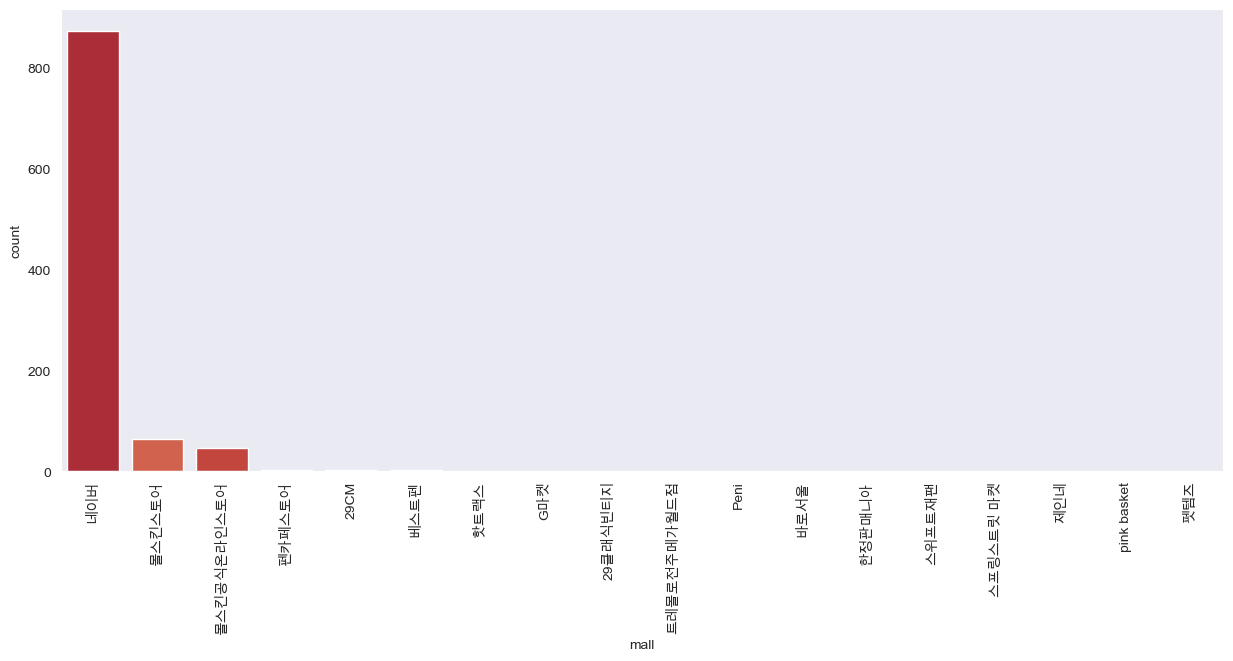

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic("matplotlib", "inline")
%matplotlib inline

rc("font", family="Arial Unicode MS")

plt.figure(figsize=(15, 6))
sns.countplot(
    data = result_mol,
    x = result_mol["mall"],
    palette="RdYlGn",
    hue=result_mol["mall"],
    order=result_mol["mall"].value_counts().index
)
plt.xticks(rotation=90)
plt.show()